In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/S&P AI/community/kaggle/aptos19

/content/drive/My Drive/S&P AI/community/kaggle/aptos19


In [6]:
!ls
!cp kaggle.json ~/.kaggle/kaggle.json
# !rm  -rf *.png
# !rm data

kaggle.json


In [0]:
!pip install kaggle;

In [7]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 8.00G/8.01G [01:21<00:00, 118MB/s]
100% 8.01G/8.01G [01:22<00:00, 105MB/s]
100% 1.50G/1.50G [00:21<00:00, 82.4MB/s]
100% 1.50G/1.50G [00:21<00:00, 74.1MB/s]
  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 7.15MB/s]
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 3.77MB/s]
100% 28.3k/28.3k [00:00<00:00, 208kB/s]



In [0]:
!unzip train_images.zip -d train_images
!unzip test_images -d test_images

In [9]:
!ls

kaggle.json	       test.csv     test_images.zip  train_images
sample_submission.csv  test_images  train.csv	     train_images.zip


In [0]:
import torch
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [0]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [15]:
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


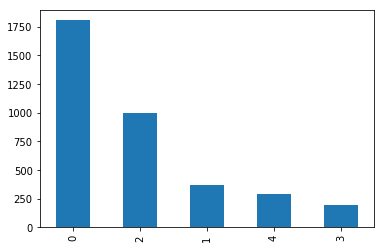

In [19]:
train['diagnosis'].value_counts().plot(kind='bar')

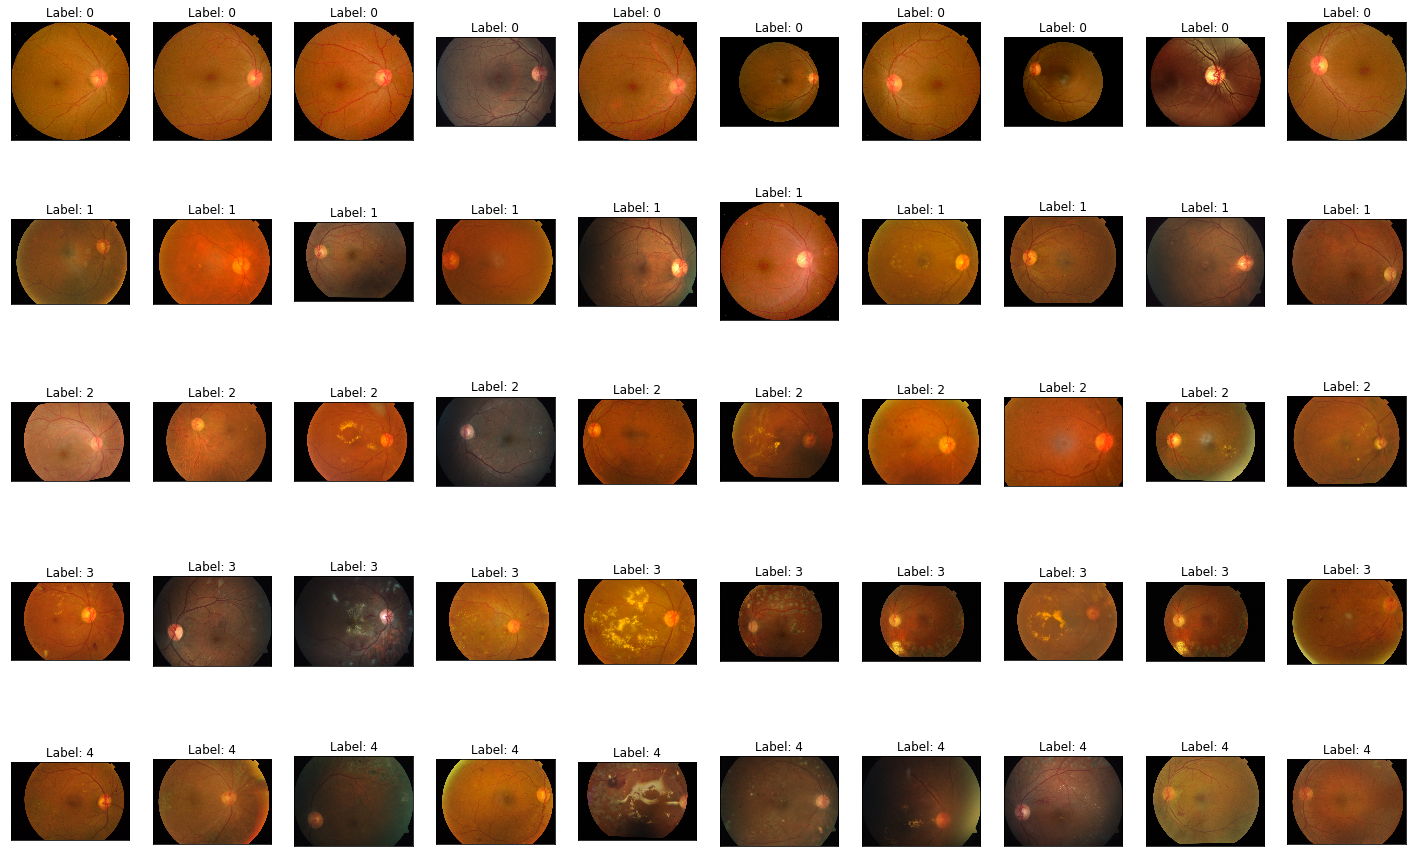

In [32]:
from PIL import Image

fig = plt.figure(figsize=(25, 16))

for class_id in sorted(train['diagnosis'].unique()):
  for i, (idx, row) in enumerate(train.loc[train['diagnosis'] == class_id].sample(10).iterrows()):
       ax = fig.add_subplot(5, 10, class_id * 10 + i + 1, xticks=[], yticks=[])
       im = Image.open(f"train_images/{row['id_code']}.png")
       plt.imshow(im)
       ax.set_title(f'Label: {class_id}')

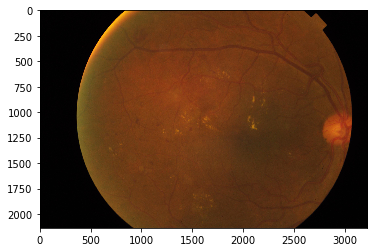

In [34]:
img = Image.open(f'train_images/{train.iloc[0]["id_code"]}.png')
plt.imshow(img)

In [0]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()]),
                                      transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])
data_dir = '.'
train_data_dir = './train_images'
test_data_dir = './test_images'

train_data = datasets.ImageFolder(train_data_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_data_dir, transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data)
testloader = torch.utils.data.DataLoader(test_data)
